# Exploratory Data Analysis

In this section, we will be doing EDA to determine which features are relevant and useful, how we can further perform feature engineering and incorporate them into our models. <br>

Most importantly, we are only performing EDA on the train data to prevent data leakage and seeing data that we are 'not supposed to see'

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.max_rows', None)     # Show all rows
pd.set_option('display.width', None)        # Width of the display in characters
pd.set_option('display.max_colwidth', None) # Show full content of each 

import warnings 
warnings.filterwarnings('ignore')

In [6]:
joined_train_data = pd.read_csv('data_exports/joined_train_data.csv')

In [7]:
joined_train_data.columns

Index(['user_id', 'video_id', 'time', 'watch_ratio', 'user_active_degree',
       'is_lowactive_period', 'is_live_streamer', 'is_video_author',
       'follow_user_num', 'fans_user_num', 'friend_user_num', 'register_days',
       'author_id', 'video_type', 'video_tag_name', 'video_duration',
       'show_cnt', 'play_cnt', 'play_duration', 'like_cnt', 'comment_cnt',
       'share_cnt', 'follow_cnt', 'collect_cnt', 'manual_cover_text',
       'caption', 'topic_tag', 'first_level_category_name',
       'second_level_category_name', 'third_level_category_name',
       'english_caption', 'english_first_level_category_name',
       'english_second_level_category_name',
       'english_third_level_category_name', 'english_topic_tag'],
      dtype='object')

In [8]:
joined_train_data.head(10)

,user_id,video_id,time,watch_ratio,user_active_degree,is_lowactive_period,is_live_streamer,is_video_author,follow_user_num,fans_user_num,friend_user_num,register_days,author_id,video_type,video_tag_name,video_duration,show_cnt,play_cnt,play_duration,like_cnt,comment_cnt,share_cnt,follow_cnt,collect_cnt,manual_cover_text,caption,topic_tag,first_level_category_name,second_level_category_name,third_level_category_name,english_caption,english_first_level_category_name,english_second_level_category_name,english_third_level_category_name,english_topic_tag
0,14,148,2020-07-05 05:27:48.378,0.722103,full_active,0,0,1,73,6,1,279,6332,NORMAL,"女青年, 男孩",6066.0,4403123,4602349,57604317617,29772,4513,545,1933,5.0,UNKNOWN,美60岁奶奶与21少年一见钟情，兴奋分享初次体验，称：升华了感情！ @推广小助手(O40300047),[],情感,情感关系,亲密关系,"A 60-year-old American grandmother fell in love with a 21-year-old boy at first sight, and excitedly shared her initial experience, saying: ""It has elevated our relationship!""",Emotion,Emotional relationships,Intimate relationship,[]
1,14,183,2020-07-05 05:28:00.057,1.907377,full_active,0,0,1,73,6,1,279,7626,NORMAL,饮料,6100.0,8908659,9167491,122472453409,210626,5676,1494,5422,7.0,UNKNOWN,合肥高铁南站，他带了瓶开过封的茅台被拦下，酒值4000元他舍不得扔，就一饮而尽。,[],民生资讯,社会事件,UNKNOWN,"At Hefei High-Speed Rail South Station, he was stopped when he tried to bring a half-open bottle of Maotai, which was worth 4000 yuan. He couldn't bear to throw it away and drank it all in one go.",Public information on livelihood issues,Social events,UNKNOWN,[]
2,14,3649,2020-07-05 05:29:09.479,2.063311,full_active,0,0,1,73,6,1,279,7136,NORMAL,电梯,10866.0,13746742,14210494,243469686292,278490,5873,8345,17293,6.0,UNKNOWN,美女裤兜上插“菜刀”吓坏旁人 哦豁，拔出来才发现是手机壳,[],民生资讯,社会事件,社会新闻,"A beautiful lady had a ""knife"" stuck in her pants pocket, scaring people nearby; oh well, it turned out to be just a phone case.",Public information on livelihood issues,Social events,Social news,[]
3,14,5262,2020-07-05 05:30:43.285,0.566388,full_active,0,0,1,73,6,1,279,1854,NORMAL,新生儿,7907.0,21484761,21153170,243599084985,1241264,25672,7797,97123,273.0,生了个洋娃娃,生了个洋娃娃，婆婆非要发出来给大家看看，看看有没有人点赞，一分钟催我看一下，一分钟催我看一下😂,[],时尚,穿搭,UNKNOWN,"Had a doll baby, grandma insisted on showing it to everyone to see if anyone would like it. She kept urging me to take a look in one minute, and then urged me again in another minute 😂",Fashion,Dressing up,UNKNOWN,[]
4,14,8234,2020-07-05 05:35:43.459,0.418364,full_active,0,0,1,73,6,1,279,395,NORMAL,舞台,11000.0,6206253,5954027,84340211498,86911,4279,175,4754,2.0,小时候火遍大江南北的小和尚 郝劭文,#郝劭文 小时候火遍全国，跟释小龙一起成为一代人最喜爱的童星，长大后却没能大火，你还记得那个可爱的小和尚吗？,[郝劭文],明星娱乐,娱乐八卦,饭制,"# Hao Shaowen was widely popular across China in his childhood, alongside Shi Xiaolong, becoming one of the most beloved child stars of a generation. Yet, as he grew up, he didn't achieve the same level of fame. Do you still remember that cute little monk?",Stars' Entertainment,Entertainment gossip,Food preparation,[Gao Shaowen]
5,14,6789,2020-07-05 05:36:00.773,0.648753,full_active,0,0,1,73,6,1,279,6733,NORMAL,舞台,13266.0,5611737,5754911,75255809217,54588,1240,107,6733,5.0,差点就踢到了吓一跳😂,@黄会赢.💃💃💃(O205387233),[],舞蹈,舞蹈日常,UNKNOWN,@Huang Huiyong.💃💃💃(O205387233),Dance,Dance Routine,UNKNOWN,[]
6,14,1963,2020-07-05 05:36:47.741,0.898123,full_active,0,0,1,73,6,1,279,5415,NORMAL,截图,9533.0,21198366,22015268,368088297332,916668,25076,20080,18578,374.0,UNKNOWN,媳妇：是我生还是你生？,[],民生资讯,社会事件,社会新闻,Wife: Do you give birth or do I?,Public information on livelihood issues,Social events,Social news,[]
7,14,175,2020-07-05 05:49:27.965,0.250247,full_active,0,0,1,73,6,1,279,27,NORMAL,吃播,46513.0,1782895,1843140,54758307716,14534,61,128,1626,5.0,幸福的种类千千万，知足最幸福 简单的晚饭做好了,感性的人过不了柴米油盐，理性的人过不了风花雪月，愿你一半烟火一般诗意，过成自己喜欢的样子❤️#女人 #美食,"[女人,念想饭局,美食]",美食,UNKNOWN,UNKNOWN,"Sensible people struggle with everyday chores, while rational ones miss out on romance. Hope you can blend the mundane and the poetic to become who you want to be. ❤️#Women #Food",Delicacies,UNKNOWN,UNKNOWN,"[Woman, thinks about dinner, delicious food]"
8,14,

# Analysis on User Characteristics

## Distribution of User Active Degree

We are looking at distribution of user activity: full_active, high_active, unknown and middle_active. This helps us determine rough user activities for each user.


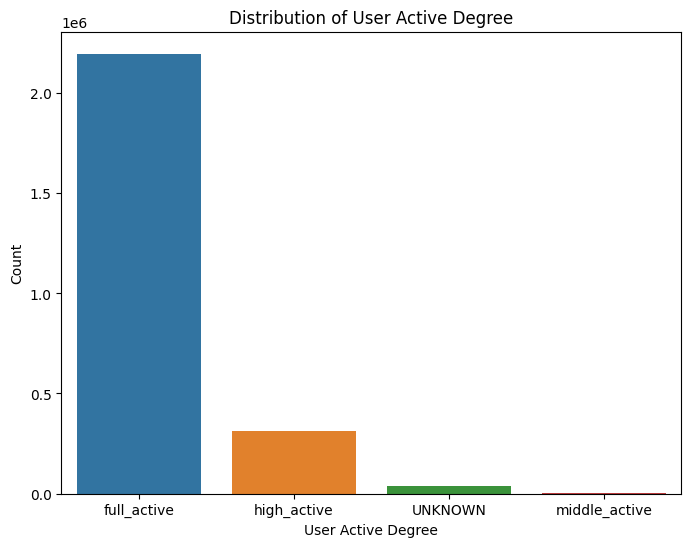

In [9]:
# Distribution of User Active Degree
plt.figure(figsize=(8, 6))
sns.countplot(data=joined_train_data, x='user_active_degree', order=joined_train_data['user_active_degree'].value_counts().index)
plt.title('Distribution of User Active Degree')
plt.xlabel('User Active Degree')
plt.ylabel('Count')
plt.show()

Key observations:
- Highly skewed distribution with full_active dominating (~2.1M users)
- High_active follows with ~300K users (7:1 ratio vs full_active)
- Minimal unknown users present
- Middle_active category has (almost) zero presence

## User Network Analysis

This scatter plot visualizes the relationship between user registration age and their social network size (followers, fans, and friends).


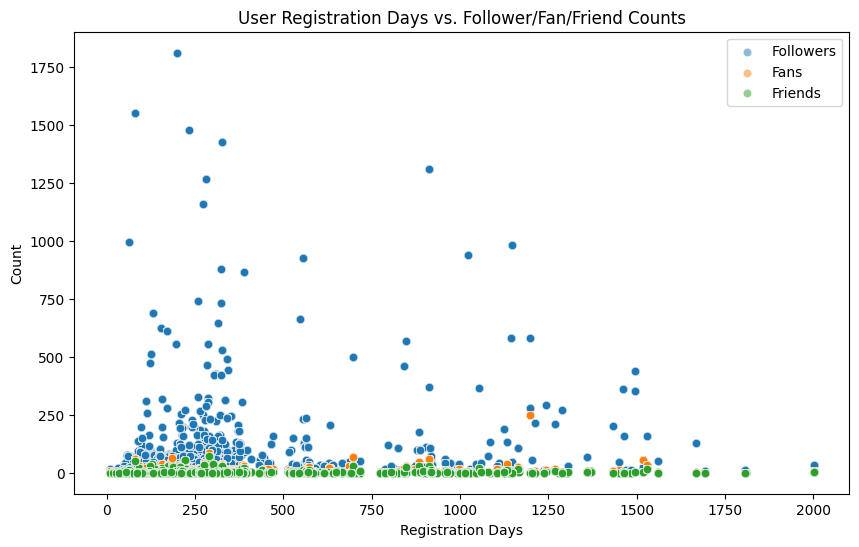

In [10]:
# Relationship between user registration days and follower/fan/friend counts
plt.figure(figsize=(10,6))
sns.scatterplot(data=joined_train_data, x='register_days', y='follow_user_num', label='Followers', alpha=0.5)
sns.scatterplot(data=joined_train_data, x='register_days', y='fans_user_num', label='Fans', alpha=0.5)
sns.scatterplot(data=joined_train_data, x='register_days', y='friend_user_num', label='Friends', alpha=0.5)
plt.title('User Registration Days vs. Follower/Fan/Friend Counts')
plt.xlabel('Registration Days')
plt.ylabel('Count')
plt.legend()
plt.show()

The plot reveals that newer accounts (lower registration days) tend to have higher follower counts, with some reaching up to 1,750 followers.

Key observations:
- Followers show highest variation and counts (blue dots, up to 1,750)
- Both fans and friends remain consistently low regardless of account age
- Higher activity/network growth in first 750 days after registration
- Gradual decrease in maximum follower counts as accounts age

# Content Creator Analysis

The bar chart illustrates the distribution of content creators across different categories: live streamers, video authors, both, or neither. 

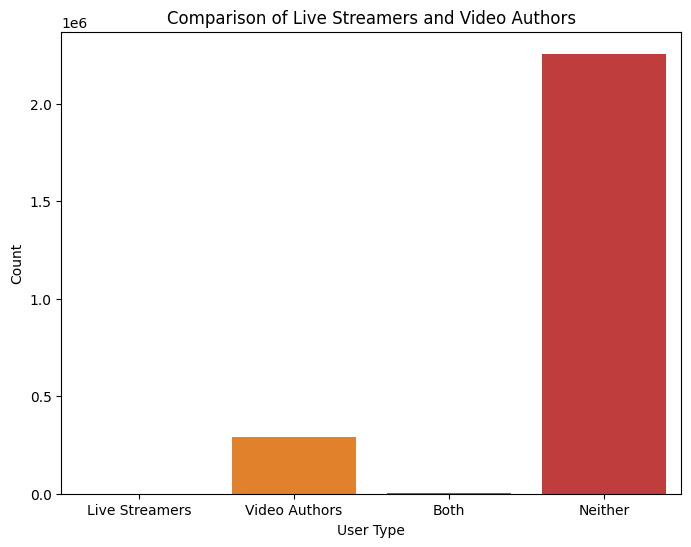

In [11]:
# Comparison of Live Streamers and Video Authors
labels = ['Live Streamers', 'Video Authors', 'Both', 'Neither']
conditions = [
    (joined_train_data['is_live_streamer'] == 1) & (joined_train_data['is_video_author'] == 0),
    (joined_train_data['is_live_streamer'] == 0) & (joined_train_data['is_video_author'] == 1),
    (joined_train_data['is_live_streamer'] == 1) & (joined_train_data['is_video_author'] == 1),
    (joined_train_data['is_live_streamer'] == 0) & (joined_train_data['is_video_author'] == 0)
]
joined_train_data['user_type'] = np.select(conditions, labels)
plt.figure(figsize=(8, 6))
sns.countplot(data=joined_train_data, x='user_type', order=labels)
plt.title('Comparison of Live Streamers and Video Authors')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

Most users (~2.2M) are classified as "Neither", while video authors make up around 300K users. Notably, there are very few exclusive live streamers or users who do both.

Key observations:
- Vast majority of users don't create content (~2.2M)
- Video authors form significant minority (~300K)
- Live streaming is rare (minimal exclusive streamers)
- Almost no users engage in both activities

## Social Network Metrics Analysis (# Followers, friends, fans)

The bar chart shows the average number of followers, fans, and friends per user.

Text(0.5, 1.0, 'Average Social Network Metrics')

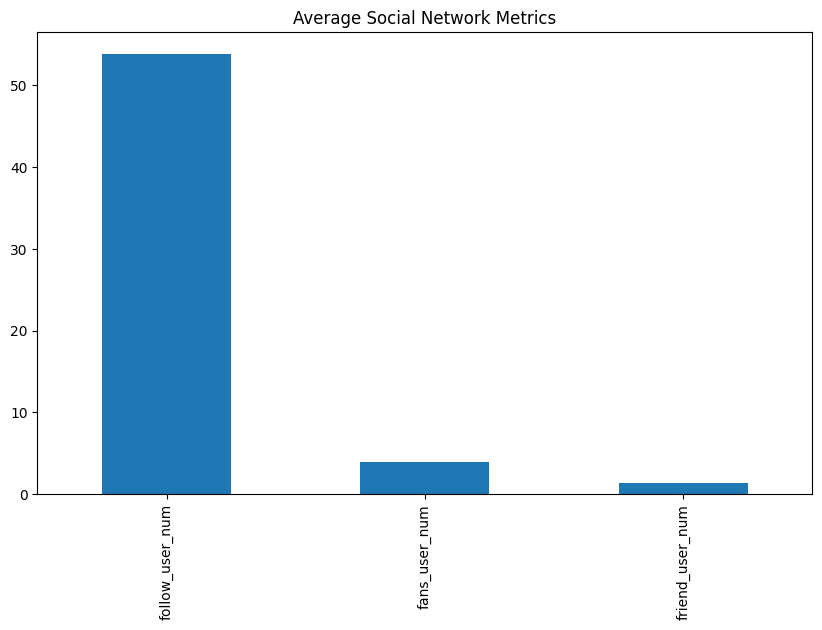

In [12]:
# Social Network Analysis
social_metrics = joined_train_data[['follow_user_num', 'fans_user_num', 'friend_user_num']].mean()
plt.figure(figsize=(10,6))
social_metrics.plot(kind='bar')
plt.title('Average Social Network Metrics')

Users typically have the highest number of followers (~53), while maintaining fewer fans (~4) and even fewer friends (~1), suggesting a broadcast-style social network where users follow content rather than forming reciprocal relationships.

Key observations:
- Followers dominate with around ~53 per user average
- Fans show moderate engagement (~4 per user)
- Friends show lowest numbers (~1 per user)
- Clear hierarchy: followers > fans > friends in general, which also makes sense in the context of short-form video content (easier to follow)

# Analysis on User Engagement Metrics

## Average Watch Ratio by Active Degree
We are attempting to analyse user behaviour based on activity (e.g., full_active more likely to use more)

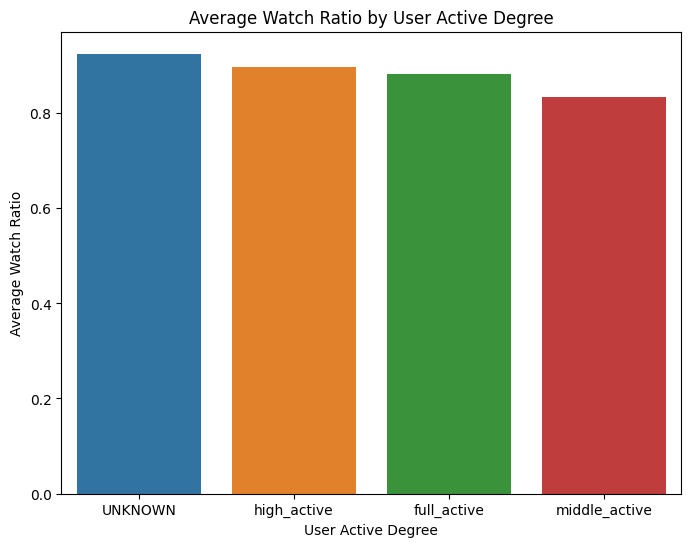

In [13]:
# Average Watch Ratio by User Active Degree
avg_watch_ratio = joined_train_data.groupby('user_active_degree')['watch_ratio'].mean().reset_index()
plt.figure(figsize=(8, 6))
sns.barplot(data=avg_watch_ratio, x='user_active_degree', y='watch_ratio', order=avg_watch_ratio.sort_values('watch_ratio', ascending=False)['user_active_degree'])
plt.title('Average Watch Ratio by User Active Degree')
plt.xlabel('User Active Degree')
plt.ylabel('Average Watch Ratio')
plt.show()

It appears that there are not much variations, but do keep in mind that middle_active is practically non-existent, and full_active is a very small minority.

Key observations:
- For some reason, Unknown appear to have slightly higher average watch ratios than high_active

## Distribution of Engagement Metrics
These histograms show the distribution of various engagement metrics (likes, comments, shares, follows, and collects)

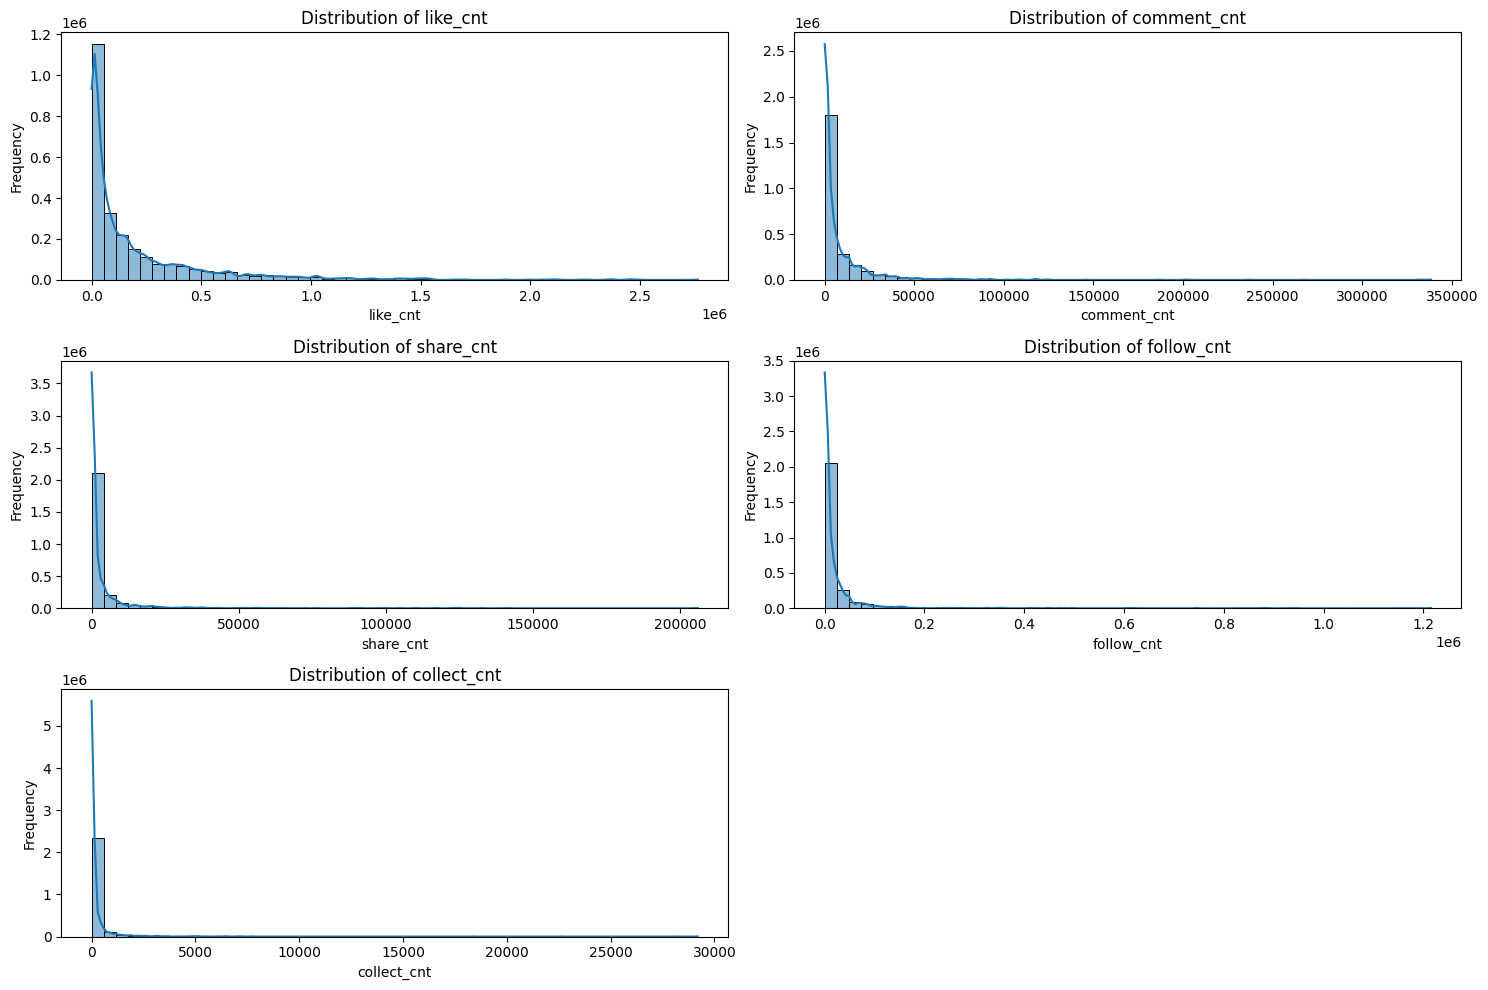

In [14]:
# Distribution of engagement metrics
engagement_metrics = ['like_cnt', 'comment_cnt', 'share_cnt', 'follow_cnt', 'collect_cnt']
plt.figure(figsize=(15,10))
for i, metric in enumerate(engagement_metrics, 1):
    plt.subplot(3, 2, i)
    sns.histplot(joined_train_data[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric}')
    plt.xlabel(metric)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

All metrics display a strong right-skewed distribution, with the majority of users having low engagement counts and a long tail of high-engaging outliers.

Key observations:
- All metrics follow similar highly skewed patterns
- Most videos have minimal engagement
- Like counts show widest spread among metrics
- Comments and shares have similar distributions, with shares being rarer
- Collection counts show most concentrated distribution near zero

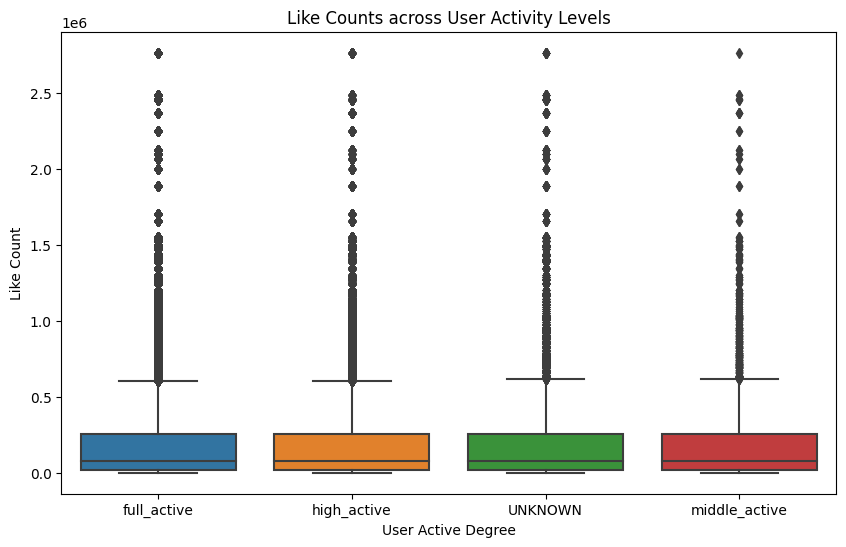

In [15]:
# Engagement metrics across user activity levels
plt.figure(figsize=(10,6))
sns.boxplot(data=joined_train_data, x='user_active_degree', y='like_cnt')
plt.title('Like Counts across User Activity Levels')
plt.xlabel('User Active Degree')
plt.ylabel('Like Count')
plt.show()


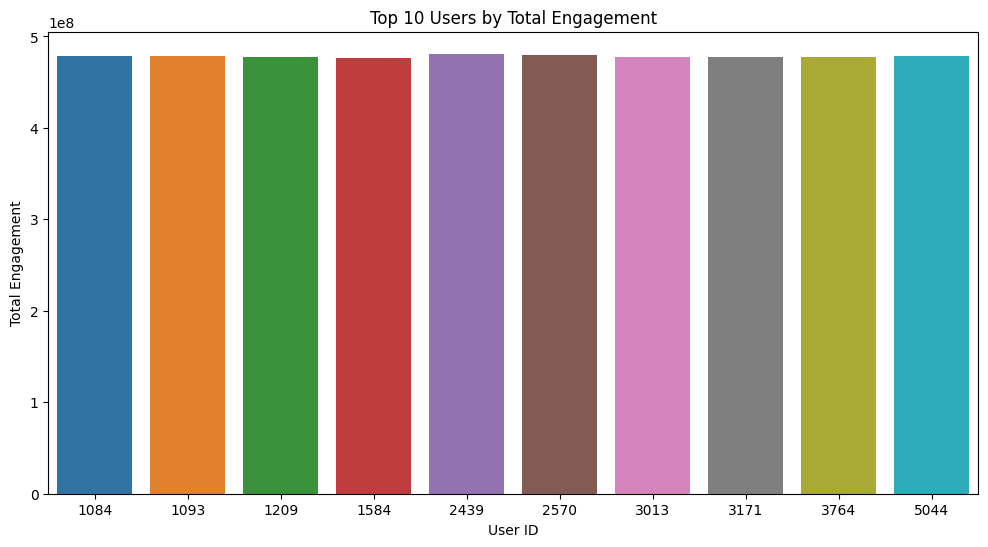

In [16]:
# Top 10 Users by Engagement
joined_train_data['total_engagement'] = joined_train_data[['like_cnt', 'comment_cnt', 'share_cnt', 'follow_cnt', 'collect_cnt']].sum(axis=1)
top_users = joined_train_data.groupby('user_id')['total_engagement'].sum().reset_index().sort_values('total_engagement', ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(data=top_users, x='user_id', y='total_engagement')
plt.title('Top 10 Users by Total Engagement')
plt.xlabel('User ID')
plt.ylabel('Total Engagement')
plt.show()

## Analysis on Content Categories

The horizontal bar chart displays the distribution of content across first-level categories (highest level)

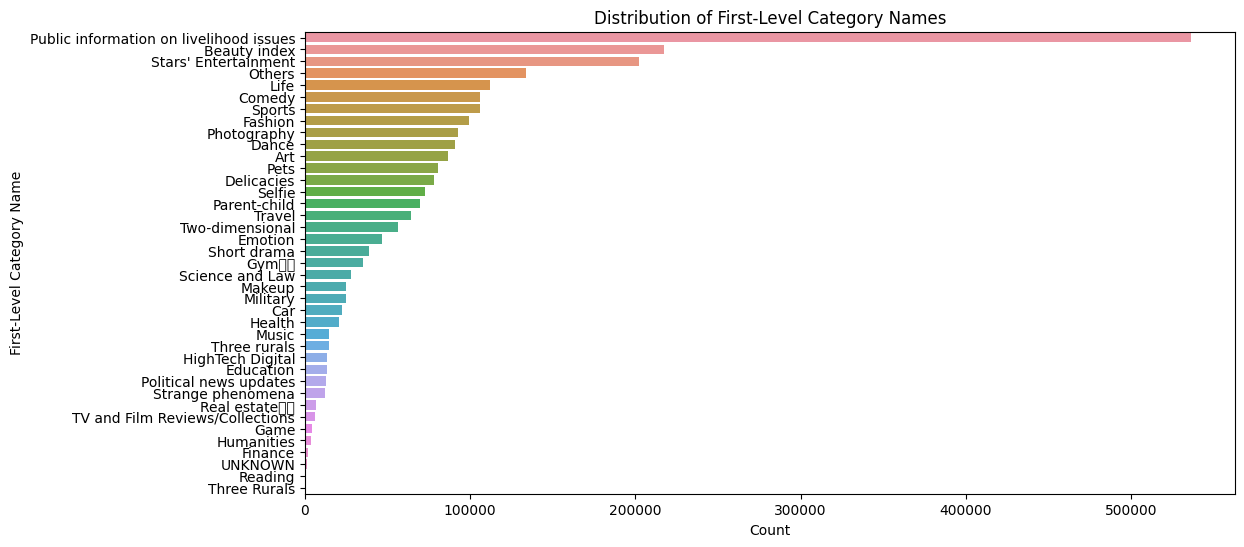

In [18]:
# Distribution of First-Level Category Names
plt.figure(figsize=(12, 6))
sns.countplot(data=joined_train_data, y='english_first_level_category_name', order=joined_train_data['english_first_level_category_name'].value_counts().index)
plt.title('Distribution of First-Level Category Names')
plt.xlabel('Count')
plt.ylabel('First-Level Category Name')
plt.show()

In the barplot, we can see that public information, beauty and entertainment categories are dominating the platform. The categories show a clear hierarchy from highly popular lifestyle content to niche topics like finance and humanities.

Key observations:
- Public information and beauty/entertainment lead (~500K and ~200K respectively)
- Lifestyle categories (life, comedy, fashion) form strong middle tier
- Creative content (photography, dance, art) shows moderate presence
- Educational and specialized content (science, military, finance) have lower counts
- Some categories show minimal activity (reading, humanities)

## Video Duration by Category
The bar chart shows average video duration across different content categories.

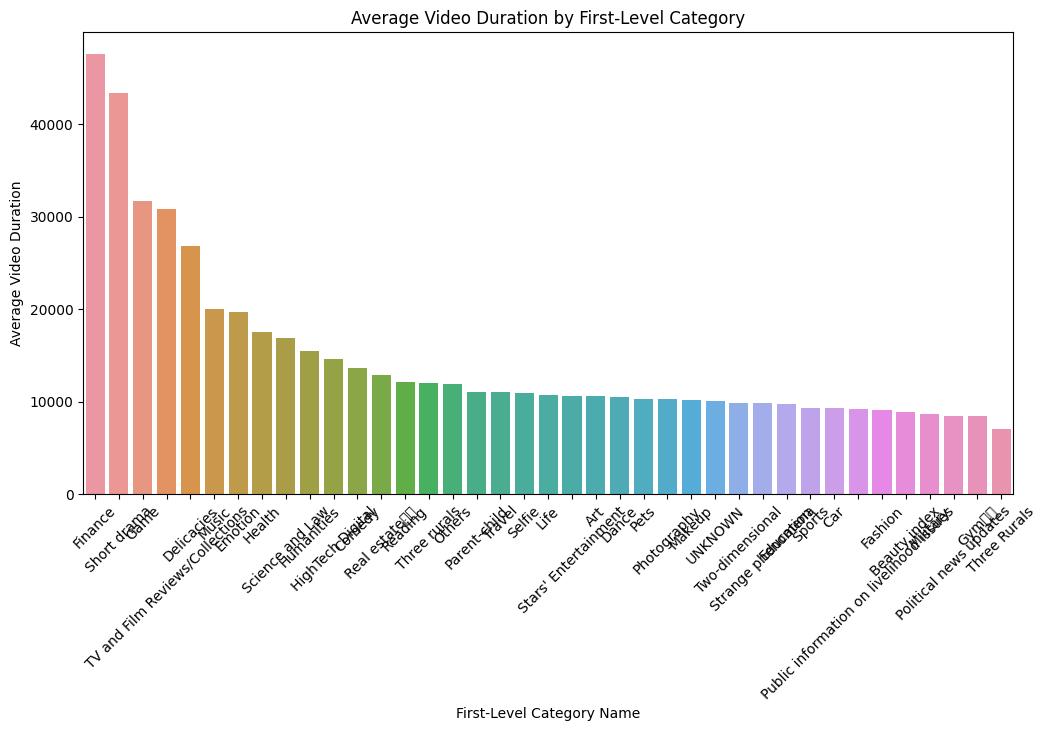

In [19]:
# Video Duration by Category
avg_duration = joined_train_data.groupby('english_first_level_category_name')['video_duration'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=avg_duration, x='english_first_level_category_name', y='video_duration', order=avg_duration.sort_values('video_duration', ascending=False)['english_first_level_category_name'])
plt.title('Average Video Duration by First-Level Category')
plt.xlabel('First-Level Category Name')
plt.ylabel('Average Video Duration')
plt.xticks(rotation=45)
plt.show()

Finance and drama-related content have significantly longer durations (~45K milliseconds), while news and rural content are shorter (~10K units), suggesting different content strategies for different topics.

Key observations:
- Finance and short drama lead with longest durations 
- Entertainment and lifestyle categories cluster in middle range 
- News and current affairs show shortest durations 
- Quite a clear three-tier structure: long-form (>30K), medium (15-30K), short-form (<15K)

# Analysis on Video Performance

## Play Count vs Like Count Correlation

A scatterplot of count vs likes.

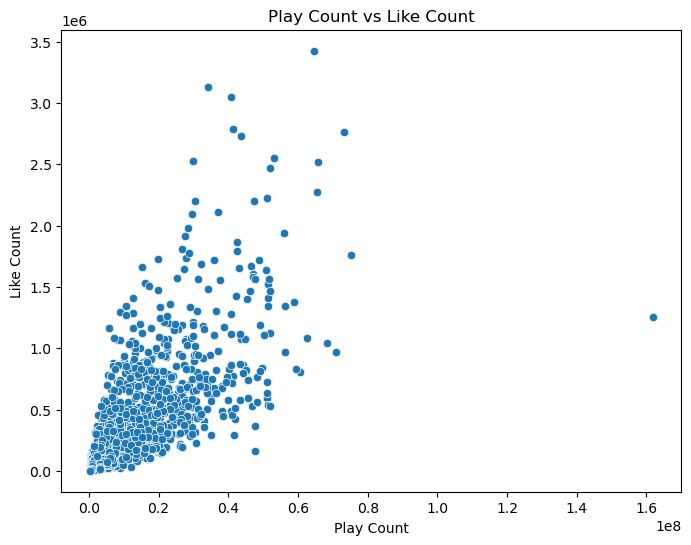

In [15]:
# Play Count vs Like Count
plt.figure(figsize=(8, 6))
sns.scatterplot(data=joined_train_data, x='play_cnt', y='like_cnt')
plt.title('Play Count vs Like Count')
plt.xlabel('Play Count')
plt.ylabel('Like Count')
plt.show()

The scatter plot reveals the relationship between video plays and likes, showing a positive correlation between views and engagement. The pattern suggests that while more views generally lead to more likes, the relationship isn't perfectly linear and shows significant variance.

Key observations:
- Strong positive correlation between plays and likes
- Data clusters heavily in lower range (0-20M plays, 0-1M likes)
- Spread increases with higher play counts
- Few outliers with very high engagement (>80M plays)

## Watch Ratio Distribution (Target Varaiable)

The histogram shows the distribution of watch ratio (viewing duration relative to video length)

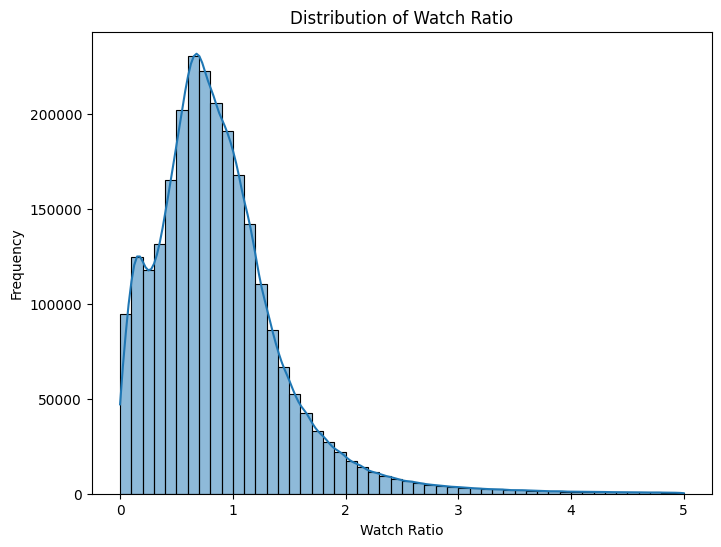

In [20]:
# Watch Ratio Distribution
plt.figure(figsize=(8, 6))
sns.histplot(data=joined_train_data, x='watch_ratio', bins=50, kde=True)
plt.title('Distribution of Watch Ratio')
plt.xlabel('Watch Ratio')
plt.ylabel('Frequency')
plt.show()

Most values of watch ratio are concentrated between 0.5 and 1.5. The distribution exhibits a right-skewed pattern with a peak around 0.8-1.0, indicating typical viewing behaviors.

Key observations:
- Peak frequency around 0.8-1.0 watch ratio
- Right-skewed distribution with long tail
- Majority of views fall between 0.5-1.5 ratio
- Sharp decline after ratio of 2.0
- Few cases of extremely high ratios (>3.0)

## Video Duration vs Watch Ratio

Scatterplot of video duration vs watch ratio in an attempt to find out more if there is a correlation (e.g, higher video length --> lower watch_ratio)

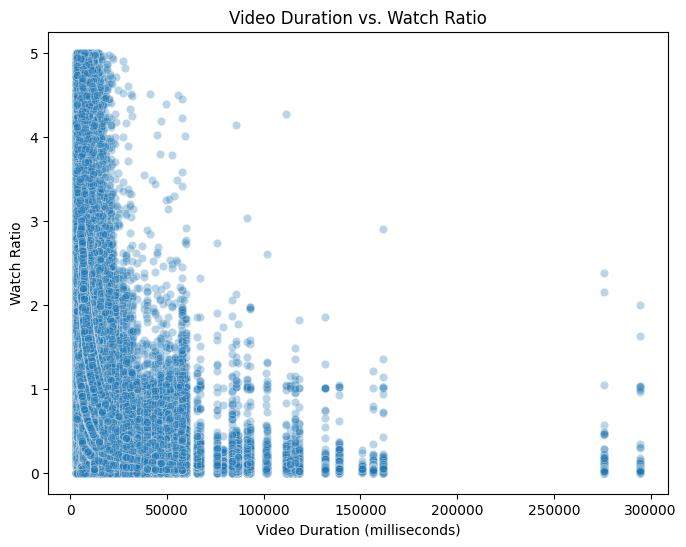

In [21]:
# Relationship between video duration and watch ratio
plt.figure(figsize=(8,6))
sns.scatterplot(data=joined_train_data, x='video_duration', y='watch_ratio', alpha=0.3)
plt.title('Video Duration vs. Watch Ratio')
plt.xlabel('Video Duration (milliseconds)')
plt.ylabel('Watch Ratio')
plt.show()

This scatter plot illustrates the relationship between video length and watch ratio, showing a clear pattern where longer videos tend to have lower watch ratios. This suggests viewers are more likely to watch shorter videos to completion.

Key observations:
- Negative correlation between duration and watch ratio
- Short videos (<50K ms) show highest watch ratio variance
- Watch ratios consistently drop for videos >100K ms

## Total Play Count over time

The line chart tracks total video plays from early July to early August 2020 (Train dataset).

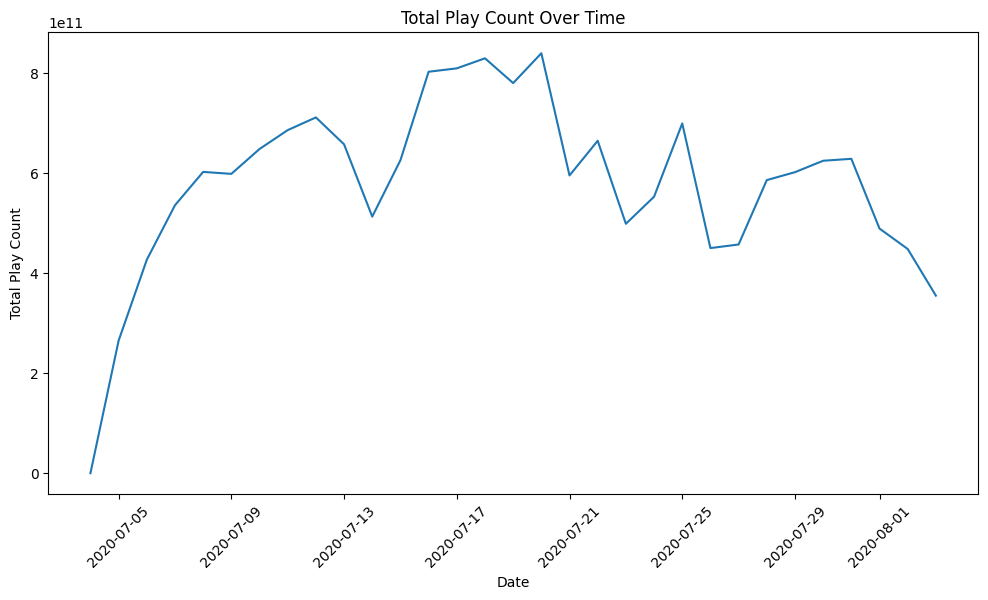

In [22]:
# Video Performance Over Time
joined_train_data['time'] = pd.to_datetime(joined_train_data['time'])
play_counts_over_time = joined_train_data.groupby(joined_train_data['time'].dt.date)['play_cnt'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=play_counts_over_time, x='time', y='play_cnt')
plt.title('Total Play Count Over Time')
plt.xlabel('Date')
plt.ylabel('Total Play Count')
plt.xticks(rotation=45)
plt.show()

The trend shows initial growth followed by fluctuating but generally high engagement mid-month, with a decline towards month-end.

Key observations:
- Rapid growth in early July (July 5-9)
- Peak engagement period mid-month (July 17-21)
- Multiple significant spikes and drops
- Overall declining trend in late July
- Final downward trend entering August